In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('dataset_bps_14.csv', sep=',')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,-14.7,-19.5,-17.5,-17.5,-17.5,-17.5,-16.7,-17.0,-16.7,-14.7,-19.5,-17.5,-16.7,-17.5,0
1,-17.5,-17.0,-16.7,-17.5,-19.5,-14.9,-14.9,-14.7,-17.5,-18.1,-19.5,-16.7,-17.5,-17.5,0
2,-17.5,-17.5,-16.7,-19.5,-14.9,-14.7,-16.7,-17.0,-18.1,-15.8,-17.0,-18.1,-19.5,-15.8,0
3,-14.7,-17.5,-18.1,-15.8,-14.7,-19.5,-18.1,-15.8,-19.5,-14.7,-16.7,-17.0,-18.1,-15.8,0
4,-15.8,-17.5,-17.0,-16.7,-17.5,-17.5,-19.5,-14.7,-15.8,-14.7,-16.7,-17.0,-18.1,-15.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,-17.0,-18.1,-15.8,-17.0,-18.1,-14.9,-14.9,-14.9,-14.9,-14.9,-19.5,-15.8,-18.1,-17.0,1
768,-17.0,-18.1,-15.8,-19.5,-14.9,-14.9,-14.9,-14.9,-14.9,-18.1,-17.0,-15.8,-18.1,-17.0,1
769,-17.0,-18.1,-15.8,-19.5,-14.9,-14.9,-14.9,-14.9,-14.9,-14.9,-14.7,-15.8,-18.1,-17.0,1
770,-17.0,-18.1,-15.8,-14.7,-14.9,-14.9,-14.9,-14.9,-14.9,-14.9,-19.5,-15.8,-18.1,-17.0,1


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
y_pred = rf_classifier.predict(X_test)

Accuracy: 0.7096774193548387
Confusion matrix:
[[69 18]
 [27 41]]
Precision: 0.706832627118644
Recall: 0.6980223123732252
F1-Score: 0.6998838259971603


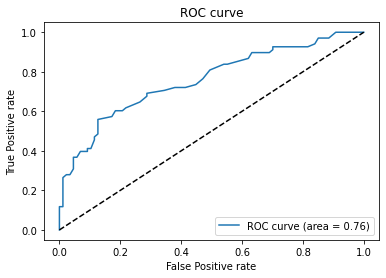

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)


precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)


recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)


f1 = f1_score(y_test, y_pred, average='macro')
print("F1-Score:", f1)


y_scores = rf_classifier.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)


plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()